In [5]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv

import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [6]:
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [7]:
start = pd.Timestamp('2019-05-01', tz='America/New_York').isoformat()
end = pd.Timestamp('2023-05-01', tz='America/New_York').isoformat()

In [8]:
tickers=["SPY"]

In [10]:
timeframe="1Day"

In [12]:
portfolio_df_year = alpaca.get_bars(tickers, timeframe, start=start, end=end).df
portfolio_df_year.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-05-01 04:00:00+00:00,294.72,294.95,291.8000,291.8200,71921870,337374,293.457138,SPY
2019-05-02 04:00:00+00:00,291.68,292.70,289.5200,291.1300,65058183,342564,291.101680,SPY
2019-05-03 04:00:00+00:00,292.82,294.34,291.2998,293.9800,56579556,249557,293.438891,SPY
2019-05-06 04:00:00+00:00,289.25,293.31,288.9000,292.8300,107250892,390959,291.952803,SPY
2019-05-07 04:00:00+00:00,290.15,290.81,285.8100,288.0500,145292657,618594,288.280747,SPY
2019-05-08 04:00:00+00:00,287.53,289.43,286.8700,287.7300,91714817,455857,288.141309,SPY
2019-05-09 04:00:00+00:00,285.23,287.33,283.3000,286.6700,103471271,526341,285.580572,SPY
2019-05-10 04:00:00+00:00,285.62,288.94,282.3000,288.0300,112603342,602402,285.828611,SPY
2019-05-13 04:00:00+00:00,282.42,283.49,279.9300,280.9905,127837979,670187,281.560182,SPY


In [14]:
SPY_closing = pd.DataFrame()
SPY_closing['close'] = portfolio_df_year['close']
SPY_closing.index = portfolio_df_year.index.date
SPY_closing.head()

,close
2019-05-01,291.82
2019-05-02,291.13
2019-05-03,293.98
2019-05-06,292.83
2019-05-07,288.05


In [15]:
SPY_daily_return = SPY_closing.pct_change().dropna()
SPY_daily_return.head()

,close
2019-05-02,-0.002364
2019-05-03,0.009789
2019-05-06,-0.003912
2019-05-07,-0.016323
2019-05-08,-0.001111


<AxesSubplot:title={'center':'SPY daily Return'}>

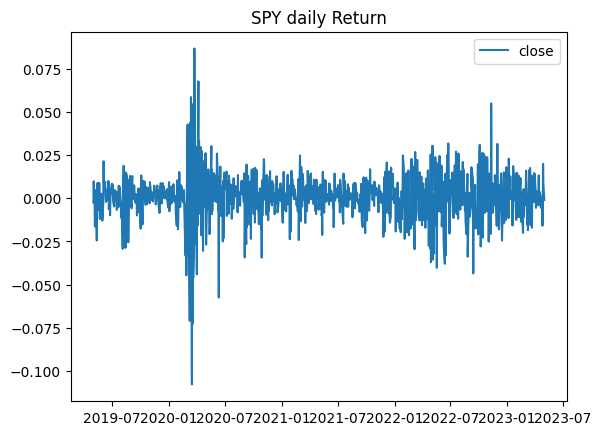

In [16]:
SPY_daily_return.plot(title='SPY daily Return')